In [1]:
import numpy as np

In [2]:
def SSE(y, t):
 return 0.5 * np.sum((y - t) ** 2)

In [3]:
def CEE(y,t):
  delta = 1e-7 # y가 0일 때 log가 무한이 되는 것을 방지
  return -np.sum(t * np.log(y + delta))

In [4]:
t = np.array([1])
a = np.array([[1],[1]])
print(a.shape)
print(a.ndim)

a = np.array([[1],[1],[1],[1]])
print(a.shape)
print(a.ndim)

(2, 1)
2
(4, 1)
2


In [5]:
print(t.shape) # (1,)
print(t.ndim)  # 1
t = t.reshape(-1, 1)
print(t.shape) # (1,1)
print(t.ndim)  # 2


(1,)
1
(1, 1)
2


In [6]:
# 미니배치용
def CEE(y,t):
  delta = 1e-7 # y가 0일 때 log가 무한이 되는 것을 방지
  if y.ndim == 1:
    # 데이터가 1장일 때(차원이 1차원 일 때)
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size



In [7]:
# 원 핫 인코딩
def CEE(y,t):
  delta = 1e-7 # y가 0일 때 log가 무한이 되는 것을 방지
  if y.ndim == 1:
    # 데이터가 1장일 때(차원이 1차원 일 때)
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y[np.arange(batch_size),t] + delta)) / batch_size


In [8]:
def numerical_diff(f,x):
  h = 1e-4 #컴퓨터에서 이 정도 작은 값을 이용해야 미분을 할 수 있다.
  return (f(x+h) - f(x-h)) / 2*h

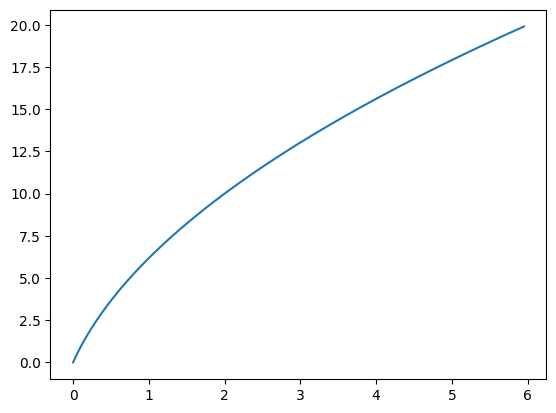

1.9999999999908982e-09
2.999999999986347e-09


In [9]:
import matplotlib.pyplot as plt

def fucntion(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = fucntion(x)

plt.plot(y,x)
plt.show()

print(numerical_diff(fucntion,5))
print(numerical_diff(fucntion,10))

In [10]:
def fucntion2(x):
  return x[0]**2 + x[1]**2

def numerical_grad(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for i in range(x.size):
    temp = x[i]
    x[i] = temp + h
    fxh1 = f(x)


    x[i] = temp - h
    fxh2 = f(x)

    grad[i] = (fxh1 - fxh2) / (2*h)
    x[i] = temp

  return grad

print(numerical_grad(fucntion2, np.array([3.0,4.0])))
print(numerical_grad(fucntion2, np.array([0.0,2.0])))
print(numerical_grad(fucntion2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [11]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
  x = init_x

  for i in range(step_num):
    grad = numerical_grad(f,x)
    x -= lr * grad

  return x

In [12]:
def fucntion2(x):
  return x[0]**2 + x[1]**2

x = np.array([-3.0,4.0])
gradient_descent(fucntion2, x, 0.1, 100)

array([-6.11110793e-10,  8.14814391e-10])

In [2]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *

from common.gradient import numerical_gradient
from common.functions import *
import numpy as np

In [6]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01) -> None:
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)


    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']

        a1 = x @ W1 + b1
        z1 = sigmoid(a1)

        a2 = z1 @ W2 + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])

        return grads
    
    
        

In [7]:
from dataset.mnist import load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1


iter_per_epoch = max(train_size / batch_size, 1)


network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in tqdm(range(iters_num)):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch) # 오래 걸린다.

    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    # loss 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)
    
    if i % 100 ==0:
        print(loss)



  0%|          | 1/10000 [03:25<570:53:55, 205.54s/it]

0.10206666666666667 0.101
2.2965078546140076


  0%|          | 5/10000 [17:19<577:04:19, 207.85s/it]


KeyboardInterrupt: 